<a href="https://colab.research.google.com/github/aryankasat/Microsoft-Engage-22/blob/main/Microsoft_Engage'22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Understanding and Data Exploration

In [77]:
#importing various libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [78]:
#reading of the dataset
data = pd.read_csv('/content/cars_engage_2022.csv')
#making an alternative of the dataset
datas = pd.read_csv('/content/cars_engage_2022.csv')

In [79]:
#summary of dataset
print (data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB
None


In [80]:
#printing the first five rows of data about cars
data.head()

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#printing the heading of the columns
x = data.columns.unique()
print (x)

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)


Understanding the Data Dictionary (various attributes of data)

In [82]:
 # Type : tells whether the car is manual or automatic in nature
data['Type'].astype('category').value_counts()

Manual       725
Automatic    522
AMT           18
DCT            7
CVT            3
Name: Type, dtype: int64

In [83]:
# highway_mileage: mileage that the car provides on the highways 
data['Highway_Mileage'].astype('category').value_counts()

22 km/litre       17
23 km/litre       16
16 km/litre       13
17 km/litre       13
25.32 km/litre    11
                  ..
23.1 km/litre      1
13.24 km/litre     1
24.07 km/litre     1
13.1 km/litre      1
23.7 km/litre      1
Name: Highway_Mileage, Length: 136, dtype: int64

In [84]:
# Fuel_Type : tells whether the car operates on what kind of fuel
data['Fuel_Type'].astype('category').value_counts()

Petrol          643
Diesel          582
CNG              16
Hybrid           15
Electric         14
CNG + Petrol      6
Name: Fuel_Type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



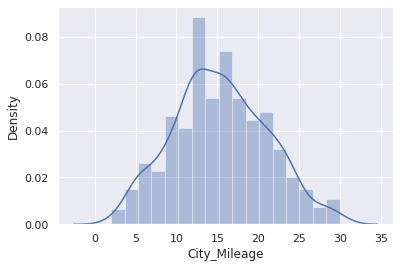

In [85]:
#city_mileage tells us about the mileage that the car provides in the city
data['City_Mileage']= data['City_Mileage'].astype (str)

#removes the unit of the mileage from the end
data['City_Mileage']=data['City_Mileage'].str.strip (' km/litre')

#few values have a unncessary question mark at the beginning which is being removed
data['City_Mileage']=data['City_Mileage'].str.strip ('?')

#in some cases decimal point is replaced by comma which is being cleaned
data['City_Mileage']=data['City_Mileage'].str.replace(',', '.')

#in some cases range of values is given and therefore this considers the least value of the range 
data['City_Mileage'] = data['City_Mileage'].apply(lambda x: x.split("-")[0])

#removing the unit which is representated by another way
data['City_Mileage']=data['City_Mileage'].str.strip ('kmpl')

#converting to float for plotting on graph 
data['City_Mileage']= data['City_Mileage'].astype (float)

#keeping the maximum mileage to 30 so that too large numbers are ignored
data['City_Mileage'] = data['City_Mileage'].clip(upper = 30)
sns.distplot((data['City_Mileage']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



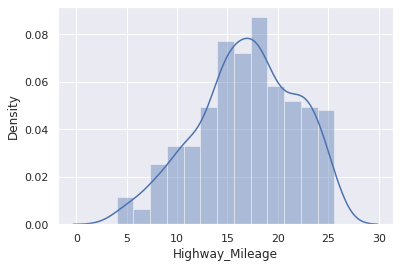

In [86]:
#highway_mileage tells us about the mileage that the car provides on the highway
data['Highway_Mileage']= data['Highway_Mileage'].astype (str)

#removes the unit of the mileage from the end
data['Highway_Mileage']=data['Highway_Mileage'].str.strip (' km/litre')

#few values have a unncessary question mark at the beginning which is being removed
data['Highway_Mileage']=data['Highway_Mileage'].str.strip ('?')

#in some cases decimal point is replaced by comma which is being cleaned
data['Highway_Mileage']=data['Highway_Mileage'].str.replace(',', '.')

#in some cases range of values is given and therefore this considers the least value of the range 
data['Highway_Mileage'] = data['Highway_Mileage'].apply(lambda x: x.split("-")[0])

#converting to float for plotting on graph 
data['Highway_Mileage']= data['Highway_Mileage'].astype (float)
sns.distplot((data['Highway_Mileage']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



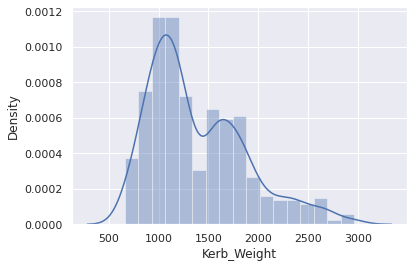

In [87]:
#kerb_weight tells the weight of the car without passengers and luggage
data['Kerb_Weight']= data['Kerb_Weight'].astype (str)

#removes the unit of the weight from the end
data['Kerb_Weight']=data['Kerb_Weight'].str.strip (' kg')

#in some cases range of values is given and therefore this considers the least value of the range 
data['Kerb_Weight'] = data['Kerb_Weight'].apply(lambda x: x.split("-")[0])

#converting to float for plotting on graph 
data['Kerb_Weight']= data['Kerb_Weight'].astype (float)
sns.distplot((data['Kerb_Weight']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



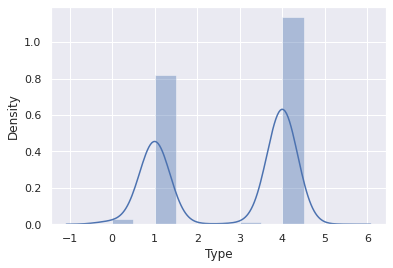

In [88]:
#using labelencoder we assigned the different to strings to different labels for analysis
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#assigning each string of different type a different number for plotting purposes
data.Type = le.fit_transform(data.Type)

sns.distplot (data['Type'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



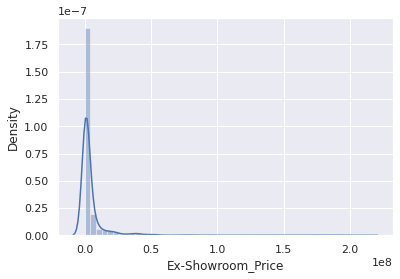

In [89]:
#Ex-Showroom_Price: tells the showroom price of the car
data['Ex-Showroom_Price']= data['Ex-Showroom_Price'].astype (str)

#removes the unit from the start
data['Ex-Showroom_Price']=data['Ex-Showroom_Price'].str.strip ('Rs. ') 

#removing all the commas
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].replace(",", "", regex=True)

#converting to float for plotting on graph 
data['Ex-Showroom_Price']= data['Ex-Showroom_Price'].astype (float)
sns.distplot (data['Ex-Showroom_Price'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



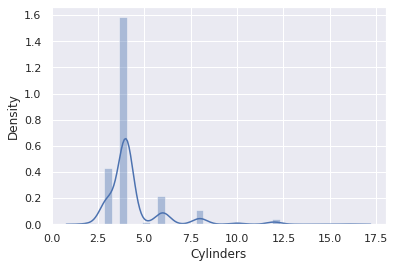

In [90]:
#Cylinders : no. of cylinders in the car for fuel  
sns.distplot(data['Cylinders'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



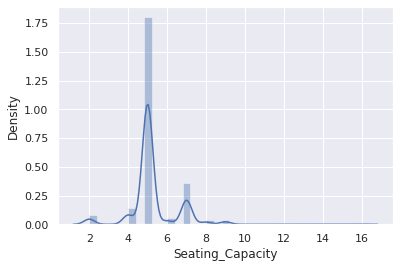

In [91]:
#Seating_Capacity : number of passengers that can seat in that car
sns.distplot(data['Seating_Capacity'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



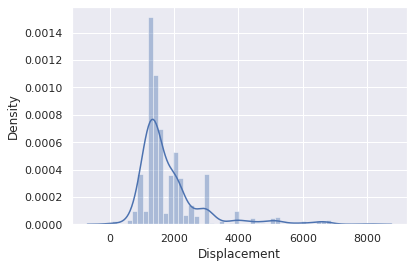

In [92]:
#Displacement tells the amount of fuel that can be pushed through the cylinders in the engine
data['Displacement']= data['Displacement'].astype (str)

#removes the unit of engine size from the end
data['Displacement']=data['Displacement'].str.strip (' cc') 

#converting to float for plotting on graph 
data['Displacement']= data['Displacement'].astype (float)
sns.distplot((data['Displacement']))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



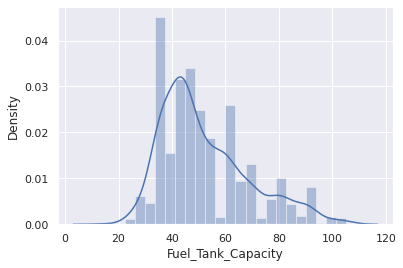

In [93]:
#Fuel_Tank_Capcity is the maximum amount of fuel 
data['Fuel_Tank_Capacity']= data['Fuel_Tank_Capacity'].astype (str)\

#removing the unit of the feature form the end
data['Fuel_Tank_Capacity']=data['Fuel_Tank_Capacity'].str.strip (' litres') 

#converting to float for plotting on graph 
data['Fuel_Tank_Capacity']= data['Fuel_Tank_Capacity'].astype (float)
sns.distplot((data['Fuel_Tank_Capacity']))
plt.show()

Data Exploration (in linear regression target variable should be linearly related to another variable)

In [94]:
# making the fuel_tank_capacity to a float datatype
data['Fuel_Tank_Capacity']= data['Fuel_Tank_Capacity'].astype (str)
data['Fuel_Tank_Capacity']=data['Fuel_Tank_Capacity'].str.strip (' litres') 
data['Fuel_Tank_Capacity']= data['Fuel_Tank_Capacity'].astype (float)

# making the displacement to a float datatype
data['Displacement']= data['Displacement'].astype (str)
data['Displacement']=data['Displacement'].str.strip (' cc') 
data['Displacement']= data['Displacement'].astype (float)

# making the height to a float datatype
data['Height']= data['Height'].astype (str)
data['Height']=data['Height'].str.strip (' mm') 
data['Height']= data['Height'].astype (float)

# making the length to a float datatype
data['Length']= data['Length'].astype (str)
data['Length']=data['Length'].str.strip (' mm') 
data['Length']= data['Length'].astype (float)

# making the width to a float datatype
data['Width']= data['Width'].astype (str)
data['Width']=data['Width'].str.strip (' mm') 
data['Width']= data['Width'].astype (float)

# making the ground_clearance to a float datatype
data['Ground_Clearance']= data['Ground_Clearance'].astype (str)
data['Ground_Clearance']=data['Ground_Clearance'].str.strip (' mm') 
data['Ground_Clearance']= data['Ground_Clearance'].astype (float)

# making the wheelbase to a float datatype
data['Wheelbase']= data['Wheelbase'].astype (str)
data['Wheelbase']=data['Wheelbase'].str.strip (' mm') 
data['Wheelbase']= data['Wheelbase'].astype (float)

#making the ex-showroom_price to a float datatype
data['Ex-Showroom_Price']= data['Ex-Showroom_Price'].astype (str)
data['Ex-Showroom_Price']=data['Ex-Showroom_Price'].str.strip ('Rs. ') 
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].replace(",", "", regex=True)
data['Ex-Showroom_Price']= data['Ex-Showroom_Price'].astype (float)

#making the type to a float datatype after giving labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Type = le.fit_transform(data.Type)

#making the city_mileage to a float datatype
data['City_Mileage']= data['City_Mileage'].astype (str)
data['City_Mileage']=data['City_Mileage'].str.strip (' km/litre')
data['City_Mileage']=data['City_Mileage'].str.strip ('?')
data['City_Mileage']=data['City_Mileage'].str.replace(',', '.')
data['City_Mileage'] = data['City_Mileage'].apply(lambda x: x.split("-")[0])
data['City_Mileage']= data['City_Mileage'].astype (float)

#making the highway_mileage to a float datatype
data['Highway_Mileage']= data['Highway_Mileage'].astype (str)
data['Highway_Mileage']=data['Highway_Mileage'].str.strip (' km/litre')
data['Highway_Mileage']=data['Highway_Mileage'].str.strip ('?')
data['Highway_Mileage']=data['Highway_Mileage'].str.replace(',', '.')
data['Highway_Mileage'] = data['Highway_Mileage'].apply(lambda x: x.split("-")[0])
data['Highway_Mileage']= data['Highway_Mileage'].astype (float)

#making the kerb_weight to a float datatype
data['Kerb_Weight']= data['Kerb_Weight'].astype (str)
data['Kerb_Weight']=data['Kerb_Weight'].str.strip (' kg')
data['Kerb_Weight'] = data['Kerb_Weight'].apply(lambda x: x.split("-")[0])
data['Kerb_Weight']= data['Kerb_Weight'].astype (float)

# shortlisting all numeric variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int'])
data_numeric.head()

,Unnamed: 0,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Ground_Clearance,Seating_Capacity,Type,Wheelbase,Number_of_Airbags,USB_Ports
0,0,292667.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.6,NaN,660.0,180.0,4.0,4,2230.0,NaN,NaN
1,1,236447.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.6,NaN,725.0,180.0,4.0,4,2230.0,NaN,NaN
2,2,296661.0,624.0,2.0,2.0,15.0,1652.0,3164.0,1750.0,4.0,NaN,NaN,710.0,180.0,4.0,4,2230.0,NaN,NaN
3,3,334768.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.6,NaN,725.0,180.0,4.0,1,2230.0,NaN,NaN
4,4,272223.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.6,NaN,725.0,180.0,4.0,4,2230.0,NaN,NaN


In [95]:
#fillng all the empty cells with the mean/mode of that parituclar column
data['Ex-Showroom_Price'] = data['Ex-Showroom_Price'].fillna(data['Ex-Showroom_Price'].mean())
data['Displacement'] = data['Displacement'].fillna(data['Displacement'].mean())
data['Cylinders'] = data['Cylinders'].fillna(data['Cylinders'].mode()[0])
data['Fuel_Tank_Capacity'] = data['Fuel_Tank_Capacity'].fillna(data['Fuel_Tank_Capacity'].mode())
data['Valves_Per_Cylinder'] = data['Valves_Per_Cylinder'].fillna(data['Valves_Per_Cylinder'].mode())
data['Height'] = data['Height'].fillna(data['Height'].mode())
data['Length'] = data['Length'].fillna(data['Length'].mode())
data['Width'] = data['Width'].fillna(data['Width'].mode())
data['Doors'] = data['Doors'].fillna(data['Doors'].mode())
data['Ground_Clearance'] = data['Ground_Clearance'].fillna(data['Ground_Clearance'].mode())
data['Seating_Capacity'] = data['Seating_Capacity'].fillna(data['Seating_Capacity'].mode())
data['Wheelbase'] = data['Wheelbase'].fillna(data['Wheelbase'].mode())
data['Number_of_Airbags'] = data['Number_of_Airbags'].fillna(data['Number_of_Airbags'].mean())
data['USB_Ports'] = data['USB_Ports'].fillna(data['USB_Ports'].mean())
data['Type'] = data['Type'].fillna(data['Type'].mode())
data['City_Mileage'] = data['City_Mileage'].fillna(data['City_Mileage'].mean())
data['Highway_Mileage'] = data['Highway_Mileage'].fillna(data['Highway_Mileage'].mean())
data['Kerb_Weight'] = data['Kerb_Weight'].fillna(data['Kerb_Weight'].mode())


# shortlisting all numeric variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int'])
data_numeric.head()

,Unnamed: 0,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Ground_Clearance,Seating_Capacity,Type,Wheelbase,Number_of_Airbags,USB_Ports
0,0,292667.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,660.0,180.0,4.0,4,2230.0,3.787029,1.793103
1,1,236447.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,4,2230.0,3.787029,1.793103
2,2,296661.0,624.0,2.0,2.0,15.0,1652.0,3164.0,1750.0,4.0,15.348918,16.883256,710.0,180.0,4.0,4,2230.0,3.787029,1.793103
3,3,334768.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,1,2230.0,3.787029,1.793103
4,4,272223.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,4,2230.0,3.787029,1.793103


In [96]:
#dropping the first column with name "Unnamed: 0"
data_numeric = data_numeric.drop(['Unnamed: 0'], axis=1)
data_numeric.head()

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Ground_Clearance,Seating_Capacity,Type,Wheelbase,Number_of_Airbags,USB_Ports
0,292667.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,660.0,180.0,4.0,4,2230.0,3.787029,1.793103
1,236447.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,4,2230.0,3.787029,1.793103
2,296661.0,624.0,2.0,2.0,15.0,1652.0,3164.0,1750.0,4.0,15.348918,16.883256,710.0,180.0,4.0,4,2230.0,3.787029,1.793103
3,334768.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,1,2230.0,3.787029,1.793103
4,272223.0,624.0,2.0,2.0,24.0,1652.0,3164.0,1750.0,5.0,23.600000,16.883256,725.0,180.0,4.0,4,2230.0,3.787029,1.793103


<Figure size 1440x720 with 0 Axes>

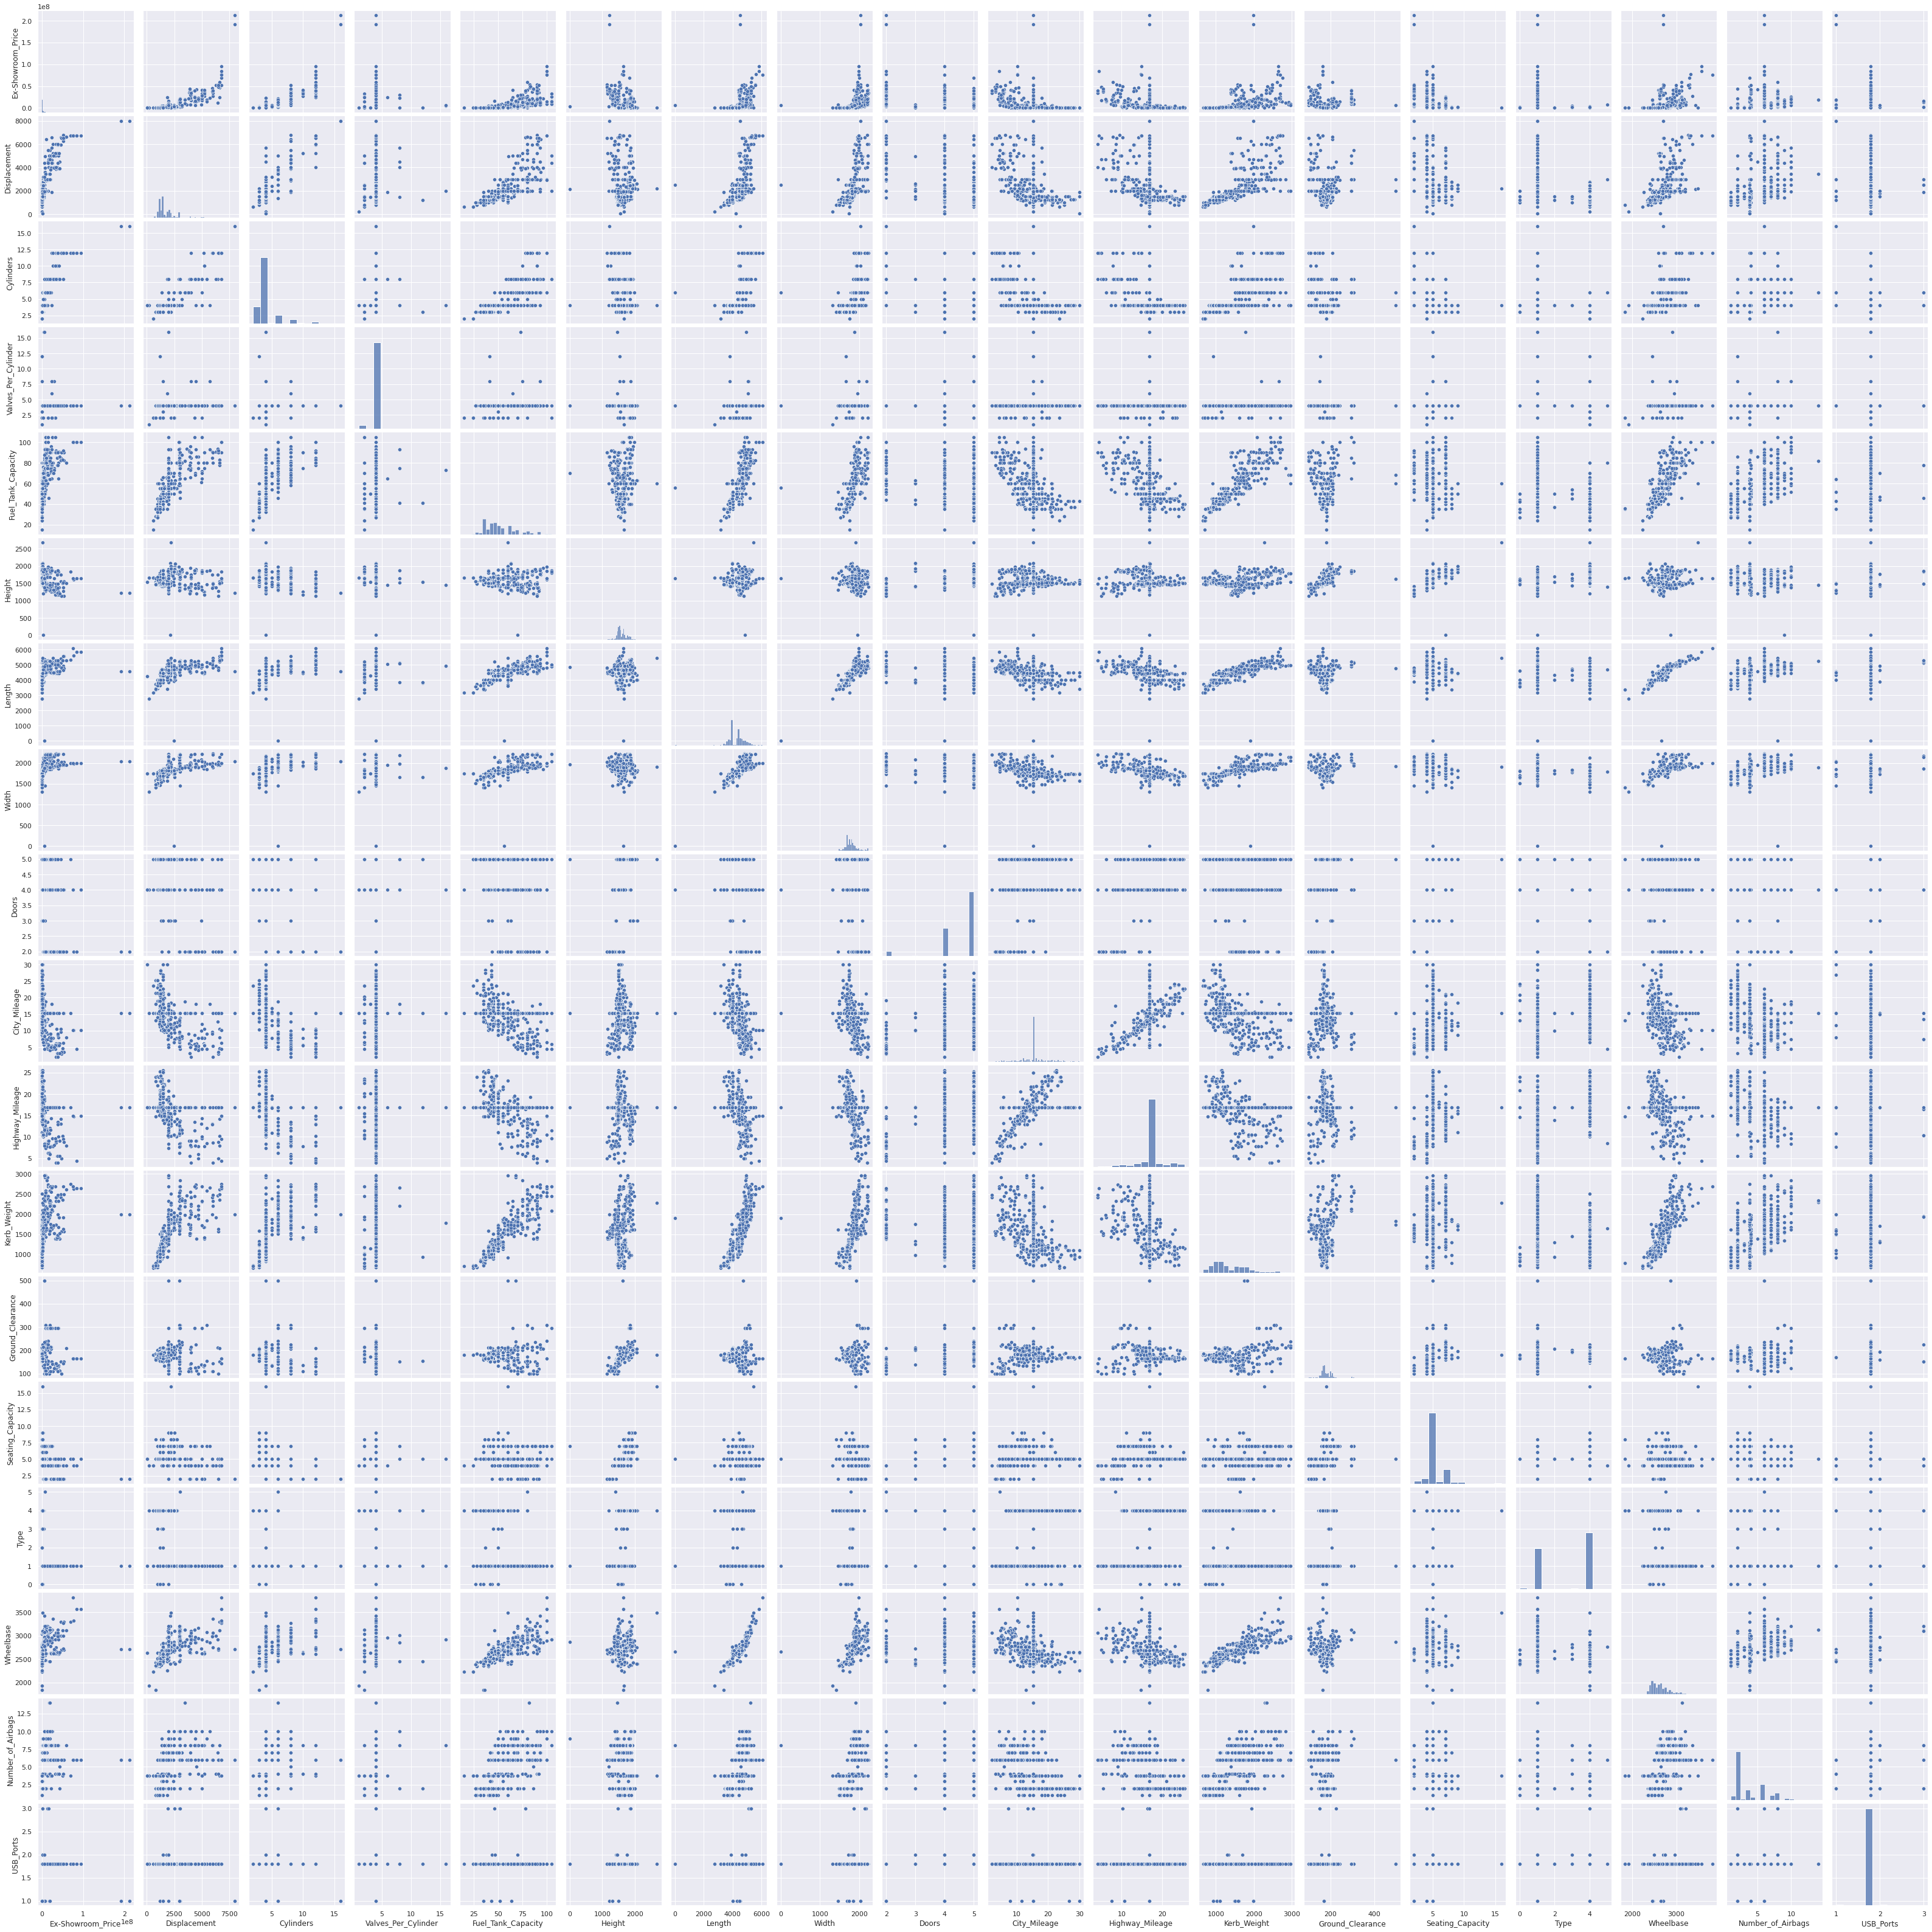

In [97]:
#building a pairwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

In [98]:
#building the correlation matrix
cormat = data_numeric.corr()
cormat

,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Ground_Clearance,Seating_Capacity,Type,Wheelbase,Number_of_Airbags,USB_Ports
Ex-Showroom_Price,1.000000,0.793245,0.817001,3.039182e-02,0.643359,-0.187472,0.401162,0.420144,-0.461746,-0.320317,-0.301992,0.437730,-0.019229,-0.307198,-0.340207,0.423328,0.330183,-1.699415e-01
Displacement,0.793245,1.000000,0.878926,3.421590e-02,0.797407,-0.025295,0.651137,0.620378,-0.473760,-0.519450,-0.462561,0.707191,0.033663,-0.161822,-0.447550,0.647742,0.532715,-3.145934e-02
Cylinders,0.817001,0.878926,1.000000,-1.431122e-03,0.696820,-0.167714,0.535101,0.521776,-0.504135,-0.430166,-0.393750,0.559301,0.000860,-0.313527,-0.394549,0.533128,0.437168,-6.816580e-02
Valves_Per_Cylinder,0.030392,0.034216,-0.001431,1.000000e+00,0.046025,-0.072332,0.083042,0.047936,-0.029962,-0.010269,-0.037303,0.088878,-0.077038,-0.024687,-0.092183,0.072460,0.064788,1.631162e-16
Fuel_Tank_Capacity,0.643359,0.797407,0.696820,4.602488e-02,1.000000,0.167254,0.795217,0.744368,-0.305433,-0.544091,-0.463508,0.869337,0.182098,0.028095,-0.477909,0.803291,0.658809,5.657846e-02
Height,-0.187472,-0.025295,-0.167714,-7.233229e-02,0.167254,1.000000,0.131762,0.173644,0.527628,-0.048283,-0.058075,0.393743,0.530243,0.724973,0.143006,0.214471,0.034612,1.158486e-01
Length,0.401162,0.651137,0.535101,8.304184e-02,0.795217,0.131762,1.000000,0.796956,-0.265952,-0.458474,-0.413631,0.799144,0.146347,0.127099,-0.432830,0.894219,0.623107,1.045435e-01
Width,0.420144,0.620378,0.521776,4.793610e-02,0.744368,0.173644,0.796956,1.000000,-0.152151,-0.373504,-0.336786,0.751848,0.275326,0.031980,-0.441900,0.718685,0.560960,7.526256e-02
Doors,-0.461746,-0.473760,-0.504135,-2.996246e-02,-0.305433,0.527628,-0.265952,-0.152151,1.000000,0.285291,0.280169,-0.132337,0.386074,0.521476,0.270287,-0.156802,-0.210805,1.004714e-01
City_Mileage,-0.320317,-0.519450,-0.430166,-1.026864e-02,-0.544091,-0.048283,-0.458474,-0.373504,0.285291,1.000000,0.656133,-0.508331,-0.035637,0.012063,0.243526,-0.418060,-0.338399,-7.203786e-02


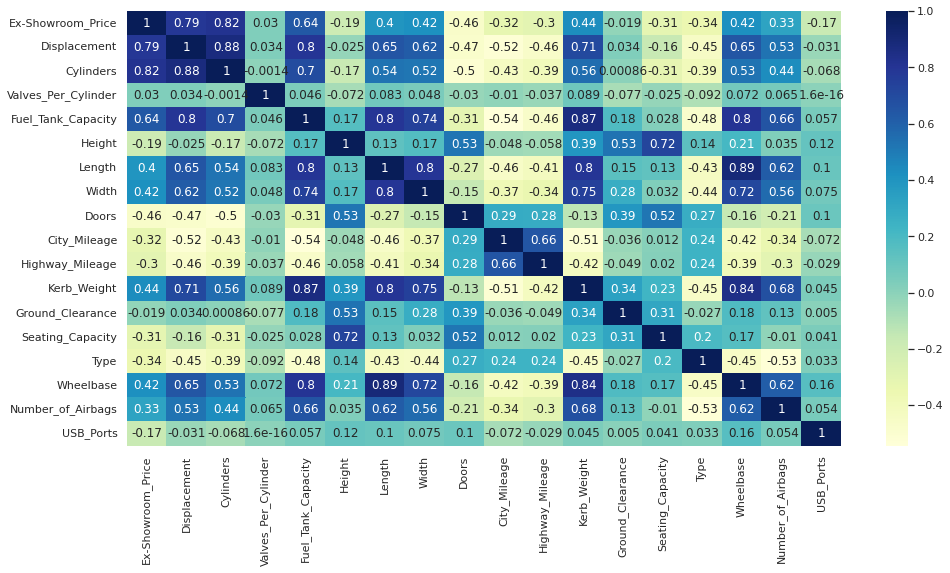

In [99]:
# showing the plots of correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# bulding of the heatmap
sns.heatmap(cormat, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful information about the data:
1. Correlation of price with independent variables 
2. Correlation among different independent variables

Data Cleaning

In [100]:
#formats
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(17), int64(2), object(122)
memory usage: 1.4+ MB


In [101]:
# checking the car company names for duplication
data['Make'].astype('category').value_counts()

Maruti Suzuki       149
Hyundai             130
Mahindra            119
Tata                100
Toyota               82
Honda                64
Skoda                43
Ford                 43
Bmw                  37
Renault              36
Volkswagen           34
Audi                 31
Nissan               29
Jeep                 28
Land Rover Rover     27
Fiat                 23
Jaguar               22
Kia                  21
Volvo                18
Datsun               15
Porsche              14
Maruti Suzuki R      14
Mg                   13
Lamborghini          13
Icml                 11
Lexus                10
Land Rover           10
Mini                 10
Maserati              9
Ferrari               8
Mitsubishi            7
Force                 6
Premier               6
Bentley               6
Isuzu                 5
Aston Martin          3
Bugatti               2
Bajaj                 2
Dc                    1
Name: Make, dtype: int64

In [102]:
 # checking the car names for duplication
data['Model'].astype('category').value_counts()

Nexon                24
Kuv100 Nxt           22
Compass              21
Xuv500               21
Amaze                20
                     ..
M5                    1
Rx 450H               1
Rs7                   1
Rs5                   1
John Cooper Works     1
Name: Model, Length: 263, dtype: int64

In [103]:
#dropping the model of the car column from the dataset
data = data.drop('Model', axis=1)

In [104]:
#checking if the model is removed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 140 entries, Unnamed: 0 to Electric_Range
dtypes: float64(17), int64(2), object(121)
memory usage: 1.4+ MB


In [105]:
#desciption about the data
data.describe()

,Unnamed: 0,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,Kerb_Weight,Ground_Clearance,Seating_Capacity,Type,Wheelbase,Number_of_Airbags,USB_Ports
count,1276.000000,1.276000e+03,1276.000000,1276.000000,1174.000000,1207.000000,1275.000000,1276.000000,1264.000000,1272.000000,1276.000000,1276.000000,911.000000,987.000000,1270.000000,1276.000000,1256.000000,1276.000000,1276.000000
mean,637.500000,4.596538e+06,1858.804589,4.361285,3.977853,52.119221,1591.093996,4296.883730,1788.550510,4.550314,15.348918,16.883256,1387.122942,179.608916,5.270079,2.706897,2631.494427,3.787029,1.793103
std,368.493781,1.214735e+07,1058.137492,1.619598,0.833763,16.458956,157.916262,476.612977,150.932385,0.747816,4.322080,3.003433,487.023099,33.109897,1.145231,1.500949,209.912640,2.385125,0.114647
min,0.000000,2.364470e+05,72.000000,2.000000,1.000000,15.000000,1.845000,4.640000,1.845000,2.000000,2.000000,4.000000,660.000000,100.000000,2.000000,0.000000,1840.000000,1.000000,1.000000
25%,318.750000,7.438760e+05,1198.000000,4.000000,4.000000,40.000000,1495.000000,3991.750000,1695.000000,4.000000,14.000000,16.883256,1020.000000,165.000000,5.000000,1.000000,2470.000000,2.000000,1.793103
50%,637.500000,1.060064e+06,1497.000000,4.000000,4.000000,46.000000,1557.000000,4331.000000,1770.000000,5.000000,15.348918,16.883256,1225.000000,170.000000,5.000000,4.000000,2600.000000,2.000000,1.793103
75%,956.250000,2.979828e+06,1998.000000,4.000000,4.000000,60.000000,1666.000000,4620.000000,1852.500000,5.000000,16.000000,16.883256,1707.500000,192.000000,5.000000,4.000000,2740.250000,6.000000,1.793103
max,1275.000000,2.121554e+08,7993.000000,16.000000,16.000000,105.000000,2670.000000,6092.000000,2226.000000,5.000000,30.000000,25.600000,2962.000000,498.000000,16.000000,5.000000,3820.000000,14.000000,3.000000


Data Preparation

In [106]:
# split into X and Y
X =data.loc[:,['City_Mileage','Kerb_Weight','Cylinders', 'Displacement','Fuel_Tank_Capacity','Height','Length','Width','Ground_Clearance','Wheelbase'
               ,'Child_Safety_Locks','Front_Brakes','Rear_Brakes','Fuel_Type','Make','Ventilation_System','Doors','Type','USB_Ports','Number_of_Airbags','Body_Type',
               'Highway_Mileage']]

Y=data['Ex-Showroom_Price']

In [107]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

,Child_Safety_Locks,Front_Brakes,Rear_Brakes,Fuel_Type,Make,Ventilation_System,Body_Type
0,Yes,Drum,Drum,Petrol,Tata,Manual Air conditioning with cooling and heating,Hatchback
1,Yes,Drum,Drum,Petrol,Tata,NaN,Hatchback
2,Yes,Drum,Drum,CNG,Tata,Air Conditioning with cooling only,Hatchback
3,Yes,Drum,Drum,Petrol,Tata,Manual Air conditioning with cooling and heating,Hatchback
4,Yes,Drum,Drum,Petrol,Tata,Air Conditioning with cooling only,Hatchback


In [108]:
# convert into dummies
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,Front_Brakes_Solid Disc,Front_Brakes_Ventilated Disc,Rear_Brakes_Solid Disc,Rear_Brakes_Ventilated Disc,Fuel_Type_CNG + Petrol,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Make_Audi,...,Body_Type_MUV,Body_Type_Pick-up,Body_Type_SUV,"Body_Type_SUV, Crossover",Body_Type_Sedan,"Body_Type_Sedan, Coupe","Body_Type_Sedan, Crossover",Body_Type_Sports,"Body_Type_Sports, Convertible","Body_Type_Sports, Hatchback"
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
# drop categorical variables 
X = X.drop(list(data_categorical.columns), axis=1)

In [110]:
# concatinate dummy variables with X
X = pd.concat([X, data_dummies], axis=1)

In [111]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are lost after scaling
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['City_Mileage', 'Kerb_Weight', 'Cylinders', 'Displacement',
       'Fuel_Tank_Capacity', 'Height', 'Length', 'Width', 'Ground_Clearance',
       'Wheelbase', 'Doors', 'Type', 'USB_Ports', 'Number_of_Airbags',
       'Highway_Mileage', 'Front_Brakes_Solid Disc',
       'Front_Brakes_Ventilated Disc', 'Rear_Brakes_Solid Disc',
       'Rear_Brakes_Ventilated Disc', 'Fuel_Type_CNG + Petrol',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Hybrid',
       'Fuel_Type_Petrol', 'Make_Audi', 'Make_Bajaj', 'Make_Bentley',
       'Make_Bmw', 'Make_Bugatti', 'Make_Datsun', 'Make_Dc', 'Make_Ferrari',
       'Make_Fiat', 'Make_Force', 'Make_Ford', 'Make_Honda', 'Make_Hyundai',
       'Make_Icml', 'Make_Isuzu', 'Make_Jaguar', 'Make_Jeep', 'Make_Kia',
       'Make_Lamborghini', 'Make_Land Rover', 'Make_Land Rover Rover',
       'Make_Lexus', 'Make_Mahindra', 'Make_Maruti Suzuki',
       'Make_Maruti Suzuki R', 'Make_Maserati', 'Make_Mg', 'Make_Mini',
       'Make_Mitsubishi', 'Make_

Model Building and Evaluation

In [112]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)



In [113]:
# Building the first model with all the features
from sklearn.linear_model import LinearRegression

# instantiate
lr = LinearRegression()

#filling any empty cells which are there in X
X_train = X_train.fillna(X_train.mean())

#fitting the input to the model
lr.fit(X_train, Y_train)

LinearRegression()

In [114]:
# print coefficients and intercept
print(lr.coef_)
print(lr.intercept_)

[ 2.71538369e+05  1.71600681e+05  2.47826005e+06  5.34119176e+06
 -8.79559756e+05 -2.96745345e+05 -2.50440219e+06  3.36267583e+05
  1.78745409e+05  3.12639411e+06 -3.30360593e+05 -6.24866618e+04
 -4.76597941e+04 -4.38778563e+05  9.79526528e+04 -5.57689517e+05
 -6.68301293e+05  2.31570416e+03  2.01672371e+04  1.53904019e+04
 -9.34107189e+05 -1.12042584e+05  9.80741600e+04 -3.93129512e+05
 -4.16886692e+04  1.60576277e+05  3.85169358e+05 -5.28276631e+05
  5.11183593e+06 -6.17838121e+04 -1.37105950e+05  1.27276803e+06
 -1.72272325e+05 -2.87924582e+05 -3.61012977e+05 -3.95534743e+05
 -4.78827075e+05 -2.52137573e+04 -2.62870912e+05 -1.98288659e+05
 -5.32709714e+05 -5.63166667e+04  6.04351909e+05 -6.06548614e+04
  2.68728458e+05 -5.54618410e+04 -7.36564685e+05 -4.42435788e+05
 -3.93801674e+05 -1.78638852e+05 -2.62242408e+05 -4.35153319e+05
 -1.50410813e+05 -3.22144718e+05  8.15710892e+04  8.02701923e+04
 -1.51254505e+05 -1.27402996e+05 -4.17393388e+05 -4.20289805e+05
 -3.93927203e+04 -9.12163

In [115]:
#filling the empty cells of X_test with the mean of the values
X_test = X_test.fillna(X_test.mean())

# predicting 
Y_pred = lr.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=Y_test, y_pred=Y_pred))

0.9108882126785514


Now we are getting approx 91% r-squared with 22 features of the car

Model Building using RFE (Recursive Feature Elimination)

Building a model using recursive feature elimination to select features. We shall start off with an arbitary number of features and then use statsmodels library to build models using the shortlisted features

In [116]:
# RFE with 19 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 19 features
lr = LinearRegression()
rfe_19 = RFE(lr,n_features_to_select=19)

# fit with 19 features
rfe_19.fit(X_train, Y_train)

# Printing the boolean results
print(rfe_19.support_)           
print(rfe_19.ranking_)  

[False  True  True  True  True  True  True False False  True  True False
 False  True False  True  True False False False  True False False False
 False False False False  True False False  True False False False False
 False False False False  True False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False]
[ 6  1  1  1  1  1  1 35 32  1  1 50 55  1 47  1  1 72 66 67  1 31 48 16
 62 34  5 11  1 60 38  1 40 14 26 23 19 64 10 37  1 61  1 56  1 57  9 25
 15 36 17  7 39 18 45 41 42 44 24 20 63 68 71 33 29 58 22 30 43 46 59 53
 70 21 65 69  1 51 13 49  8 12  3 27  4 54  2  1 28 52 74 73]


In [117]:
# making predictions using rfe model
y_pred = rfe_19.predict(X_test)

# r-squared
print(r2_score(Y_test, y_pred))

0.9025545499506725


In [118]:
# RFE with 10 features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 10 features
lr = LinearRegression()
rfe_10 = RFE(lr,n_features_to_select=10)

# fit with 6 features
rfe_10.fit(X_train, Y_train)

# predict
y_pred = rfe_10.predict(X_test)

# r-squared
print(r2_score(Y_test, y_pred))

0.8982075174818841


Here we can see that RFE with 10 features is giving 89.8% R-squared compared to 90.2% with 19 features. Therefore we choose 19 features for better performance. 

In [119]:
# import statsmodels
import statsmodels.api as smapi  

# subset the features selected by rfe_19
col_19 = X_train.columns[rfe_19.support_]

# subsetting training data for 19 selected columns
X_train_rfe_19 = X_train[col_19]

# add a constant to the model
X_train_rfe_19 = smapi.add_constant(X_train_rfe_19)
X_train_rfe_19.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,const,Kerb_Weight,Cylinders,Displacement,Fuel_Tank_Capacity,Height,Length,Wheelbase,Doors,Number_of_Airbags,Front_Brakes_Solid Disc,Front_Brakes_Ventilated Disc,Fuel_Type_Diesel,Make_Bugatti,Make_Ferrari,Make_Jeep,Make_Lamborghini,Make_Land Rover Rover,Body_Type_Coupe,"Body_Type_Sedan, Coupe"
73,1.0,-1.154836,-0.223158,-0.625688,-1.222894,0.024744,-1.252836,-0.936450,0.601568,-0.749533,-0.248121,0.305617,-0.915760,-0.039621,-0.07943,-0.149786,-0.101454,-0.147028,-0.182204,-0.039621
1033,1.0,0.550332,-0.223158,0.086219,0.843707,-0.944504,0.816740,0.993693,-0.736185,1.347615,-0.248121,0.305617,1.091989,-0.039621,-0.07943,-0.149786,-0.101454,-0.147028,-0.182204,-0.039621
510,1.0,0.017143,-0.840838,-0.624743,-0.493506,0.100764,-0.635741,-0.636206,0.601568,-0.749533,-0.248121,0.305617,-0.915760,-0.039621,-0.07943,-0.149786,-0.101454,-0.147028,-0.182204,-0.039621
46,1.0,0.017143,-0.223158,-0.730631,-1.040547,-0.196979,-1.441742,-1.103252,-0.736185,-1.168962,-0.248121,-3.272067,-0.915760,-0.039621,-0.07943,-0.149786,-0.101454,-0.147028,-0.182204,-0.039621
976,1.0,0.017143,-0.223158,-0.345842,0.479012,0.341492,0.038025,-0.102438,0.601568,0.089326,-0.248121,0.305617,1.091989,-0.039621,-0.07943,-0.149786,-0.101454,-0.147028,-0.182204,-0.039621


In [120]:
# fitting the model with 19 variables
lr_19 = smapi.OLS(Y_train, X_train_rfe_19).fit()   
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:      Ex-Showroom_Price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     556.9
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        17:56:35   Log-Likelihood:                -14581.
No. Observations:                 893   AIC:                         2.920e+04
Df Residuals:                     873   BIC:                         2.930e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

As we could see that the r-square for 19 features 92.4 for r-squared and for adjusted r-squared it is 92.2

In [121]:
# making predictions using rfe_19 smapi model
X_test_rfe_19 = X_test[col_19]


# # Adding a constant variable 
X_test_rfe_19 = smapi.add_constant(X_test_rfe_19, has_constant='add')
X_test_rfe_19.info()


# Making predictions
y_pred = lr_19.predict(X_test_rfe_19)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383 entries, 103 to 1042
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         383 non-null    float64
 1   Kerb_Weight                   383 non-null    float64
 2   Cylinders                     383 non-null    float64
 3   Displacement                  383 non-null    float64
 4   Fuel_Tank_Capacity            383 non-null    float64
 5   Height                        383 non-null    float64
 6   Length                        383 non-null    float64
 7   Wheelbase                     383 non-null    float64
 8   Doors                         383 non-null    float64
 9   Number_of_Airbags             383 non-null    float64
 10  Front_Brakes_Solid Disc       383 non-null    float64
 11  Front_Brakes_Ventilated Disc  383 non-null    float64
 12  Fuel_Type_Diesel              383 non-null    float64
 13  Ma

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [122]:
# r-squared
r2_score(Y_test, y_pred)

0.9025545499506724

Therefore, the R-squared of model with 19 features is about 92.4 for training and 90.2 for test data. 

Conduting the same procedure with 10 features

In [123]:
# subset the features selected by rfe_10
col_10 = X_train.columns[rfe_10.support_]

# subsetting training data for 10 selected columns
X_train_rfe_10 = X_train[col_10]

# add a constant to the model
X_train_rfe_10 = smapi.add_constant(X_train_rfe_10)


# fitting the model with 10 variables
lr_10 = smapi.OLS(Y_train, X_train_rfe_10).fit()   
print(lr_10.summary())


# making predictions using rfe_10 smapi model
X_test_rfe_10 = X_test[col_10]


# Adding a constant  
X_test_rfe_10 = smapi.add_constant(X_test_rfe_10, has_constant='add')
X_test_rfe_10.info()


# # Making predictions
y_pred = lr_10.predict(X_test_rfe_10)

                            OLS Regression Results                            
Dep. Variable:      Ex-Showroom_Price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     922.9
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        17:56:35   Log-Likelihood:                -14641.
No. Observations:                 893   AIC:                         2.930e+04
Df Residuals:                     882   BIC:                         2.936e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [124]:
# r2_score for 10 variables
r2_score(Y_test, y_pred)

0.8982075174818842

Therefore for a model of 10 features, the R-squared is 91.3 for training model and 89.8 for test model. It also has adjusted R-squared to be 91.2

Choosing optimal number of features

Now, we have seen that the adjusted r-squared varies from about 91.2 to 90.1 as we go from 19 to 10 features, one way to choose the optimal number of features is to make a plot between n_features and adjusted r-squared, and then choose the value of n_features.

In [125]:
n_features_list = list(range(1, 22))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(1, 22):

    # RFE with n features
    lr = LinearRegression()

    # specify number of features
    rfe_n = RFE(lr, n_features_to_select= n_features)

    # fit with n features
    rfe_n.fit(X_train, Y_train)

    # subset the features selected by rfe_10
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 10 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = smapi.add_constant(X_train_rfe_n)


    # fitting the model with 10 variables
    lr_n = smapi.OLS(Y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lr_n.rsquared_adj)
    r2.append(lr_n.rsquared)
    
    
    # making predictions using rfe_19 sm model
    X_test_rfe_n = X_test[col_n]


    # # Adding a constant variable 
    X_test_rfe_n = smapi.add_constant(X_test_rfe_n, has_constant='add')



    # # Making predictions
    y_pred = lr_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(Y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only

/usr/local/lib/python3.7/

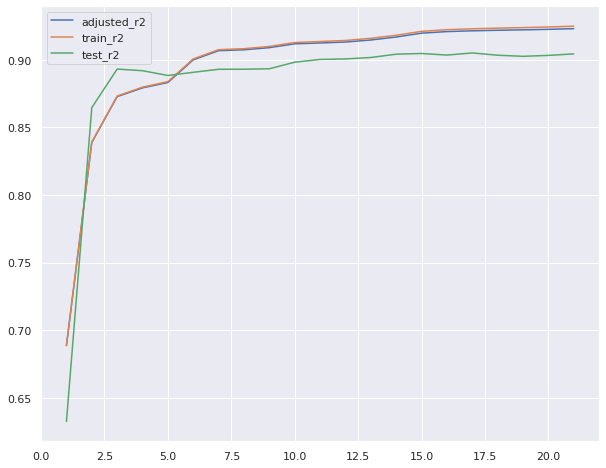

In [126]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

From the above graph we see that we can choose anything beteen 10 and 20 since below 10 the test r2-score is pretty unstable and above 17.5 it starts decreasing again. Thus it is wiser to choose 14 since from that point there is not much of a increase in the plot. 

Final Model

In [127]:
# RFE with n features
lr_10 = LinearRegression()

n_features = 14

# specify number of features
rfe_n = RFE(lr, n_features_to_select= n_features)

# fit with n features
rfe_n.fit(X_train, Y_train)

# subset the features selected by rfe_14
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 14 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = smapi.add_constant(X_train_rfe_n)


# fitting the model with 14 variables
lr_n = smapi.OLS(Y_train, X_train_rfe_n).fit()
adjusted_r2.append(lr_n.rsquared_adj)
r2.append(lr_n.rsquared)


# making predictions using rfe_19 smapi model
X_test_rfe_n = X_test[col_n]


# # Adding a constant variable 
X_test_rfe_n = smapi.add_constant(X_test_rfe_n, has_constant='add')



# # Making predictions
y_pred = lr_n.predict(X_test_rfe_n)

test_r2.append(r2_score(Y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [128]:
# summary
lr_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Ex-Showroom_Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     703.2
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        17:56:45   Log-Likelihood:                -14613.
No. Observations:                 893   AIC:                         2.926e+04
Df Residuals:                     878   BIC:                         2.933e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         4.479e+06   1.05e+05     42.791      0.000    4.27e+06    4.68e+06
Kerb_Weight                   7.164e+05   2.09e+05      3.421      0.001    3.05e+05    1.13e+06
Cylinders                     3.646e+06   2.52e+05     14.453      0.000    3.15e+06    4.14e+06
Displacement                  4.843e+06   2.81e+05     17.215      0.000    4.29e+06     5.4e+06
Fuel_Tank_Capacity           -7.822e+05   2.21e+05     -3.546      0.000   -1.22e+06   -3.49e+05
Height                        -7.73e+05   1.27e+05     -6.089      0.000   -1.02e+06   -5.24e+05
Length                       -2.555e+06   2.99e+05     -8.555      0.000   -3.14e+06   -1.97e+06
Wheelbase                     2.451e+06   2.74e+05      8.936      0.000    1.91e+06    2.99e+06
Front_Brakes_Solid Disc      -7.318e+05   1.83e+05     -4.004      0.000   -1.09e+06   -3.73e+05
Front_Brakes_Ventilated Disc -7.987e+05   1.79e+05     -4.459      0.000   -1.15e+06   -4.47e+05
Fuel_Type_Diesel             -5.685e+05   1.16e+05     -4.919      0.000   -7.95e+05   -3.42e+05
Make_Bugatti                  5.177e+06   1.34e+05     38.700      0.000    4.91e+06    5.44e+06
Make_Ferrari                  1.398e+06   1.08e+05     12.955      0.000    1.19e+06    1.61e+06
Make_Jeep                    -5.725e+05   1.18e+05     -4.851      0.000   -8.04e+05   -3.41e+05
Make_Lamborghini              5.793e+05   1.35e+05      4.303      0.000    3.15e+05    8.43e+05
==============================================================================
Omnibus:                      629.118   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            47601.885
Skew:                           2.466   Prob(JB):                         0.00
Kurtosis:                      38.426   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [129]:
# results 
r2_score(Y_test, y_pred)

0.9041305828666291

In [130]:
# calculating  the mean
np.mean(Y_test-y_pred)

393123.10710895044

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



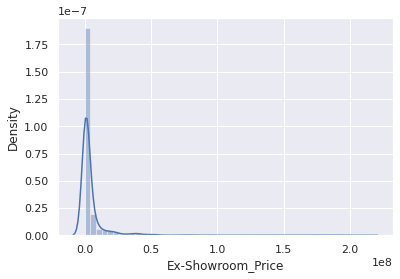

In [131]:
#showing the plot of price of the cars
sns.distplot(data['Ex-Showroom_Price'],bins=50)
plt.show()

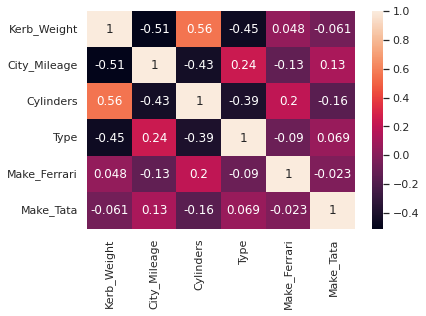

In [132]:
# multicollinearity
predictors = ['Kerb_Weight', 'City_Mileage', 'Cylinders', 
             'Type', 'Make_Ferrari', 'Make_Tata']

#plotting the heatmap of the above mentioned features
cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

Now, we move to doing the Customer Segmentation for the automobile industry using Clustering **algorithm**

Finding the features to be segmented for the customers 

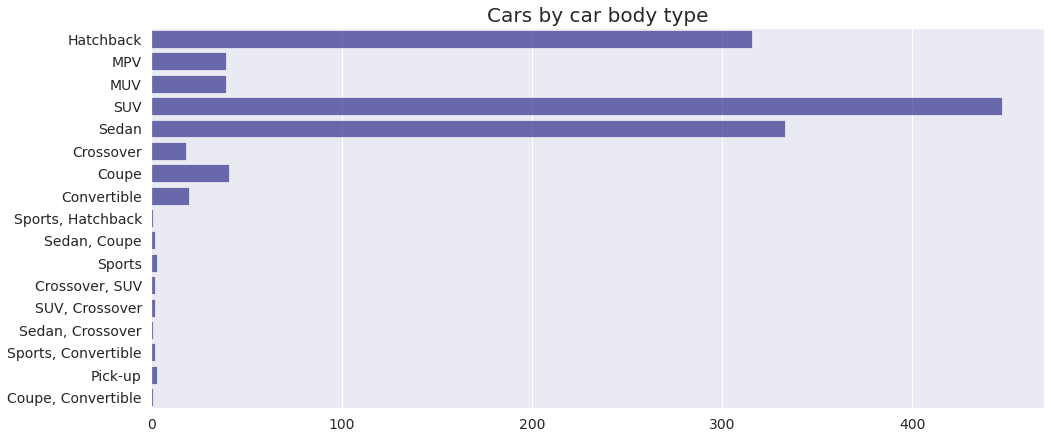

In [133]:
#plotting the body_type of cars according to the number
plt.figure(figsize=(16,7))
sns.countplot(data=data,y='Body_Type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

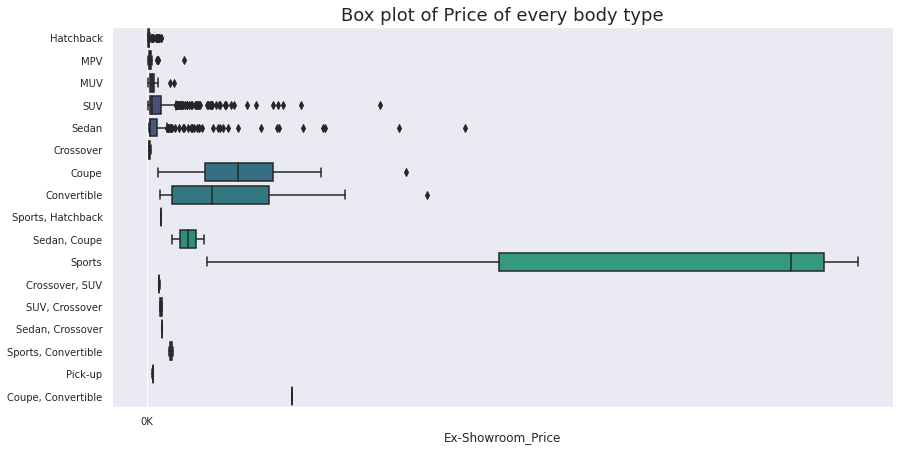

In [134]:
#plotting of body_type against the price of the car
plt.figure(figsize=(14,7))
sns.boxplot(data=data, x='Ex-Showroom_Price', y='Body_Type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=10)

#plotting the numbers on the x-axis for the Ex-Showroom price
plt.xticks([i for i in range(0,2000000,5000000)],[f'{i:,}K' for i in range(0,2000000,5000000)],fontsize=10);

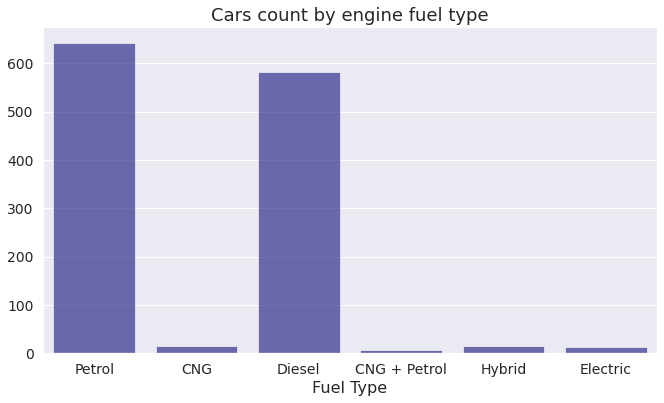

In [135]:
#counting the cars according to the fuel type
plt.figure(figsize=(11,6))
sns.countplot(data=data, x='Fuel_Type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

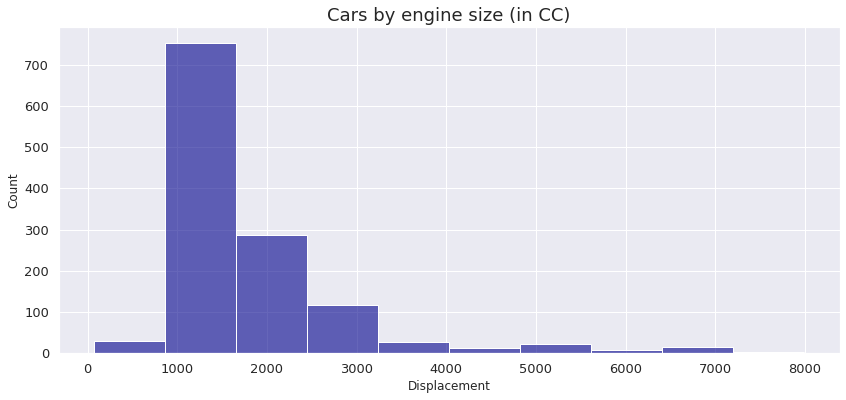

In [136]:
#plotting the car according to the engine size of the car
plt.figure(figsize=(14,6))
sns.histplot(data=data, x='Displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

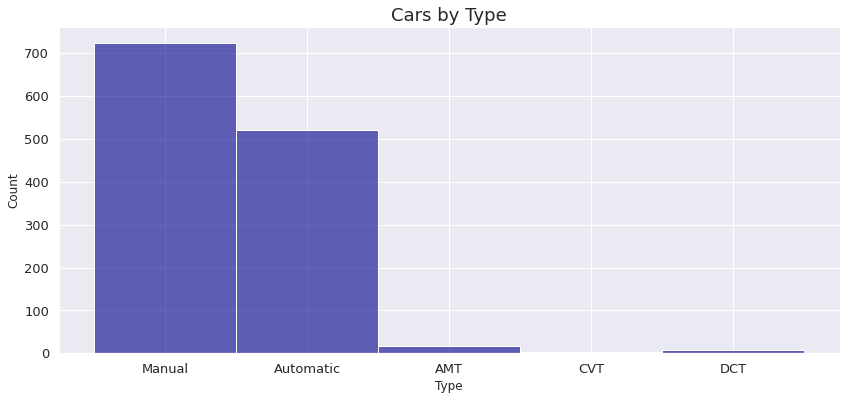

In [137]:
#plotting according to the type of the car
plt.figure(figsize=(14,6))
sns.histplot(data=datas, x='Type',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by Type',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

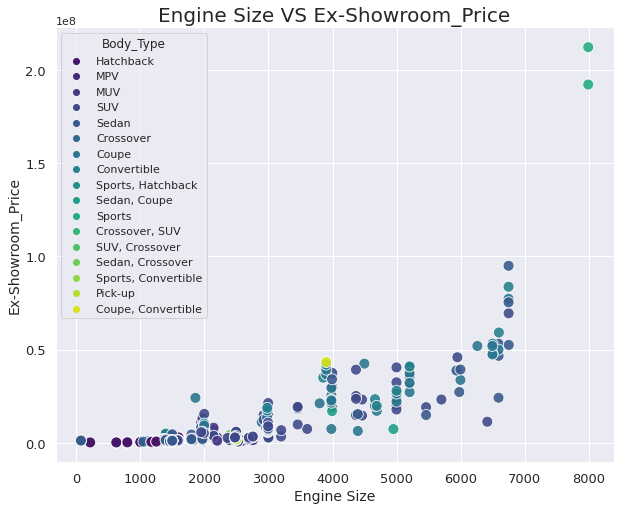

In [138]:
#plotting the relation between price and engine size with respect to the body_type of the car
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, x='Displacement', y='Ex-Showroom_Price',hue='Body_Type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('Engine Size',fontsize=14)
plt.ylabel('Ex-Showroom_Price',fontsize=14)
plt.title('Engine Size VS Ex-Showroom_Price',fontsize=20);

Text(0.5, 0, 'Ex-Showroom_Price')

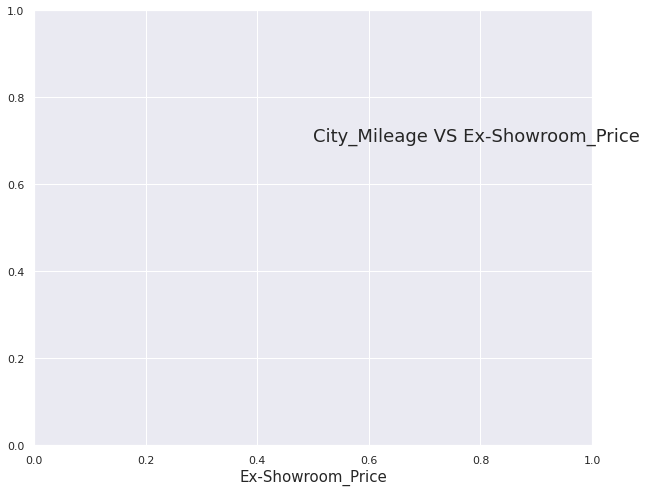

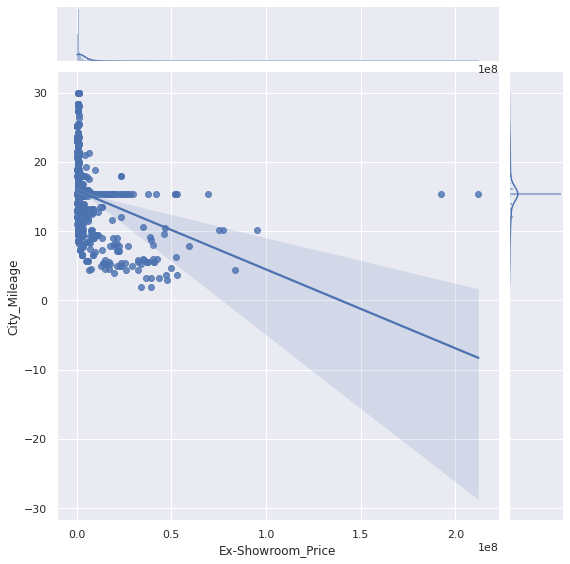

In [139]:
#plotting the relation between city_mileage and Ex-Showroom_Price
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot()
sns.jointplot(data=data, x='Ex-Showroom_Price', y='City_Mileage' ,kind= 'reg',ax= ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'City_Mileage VS Ex-Showroom_Price', fontsize=18)
ax.set_xlabel('Ex-Showroom_Price', fontsize= 15)

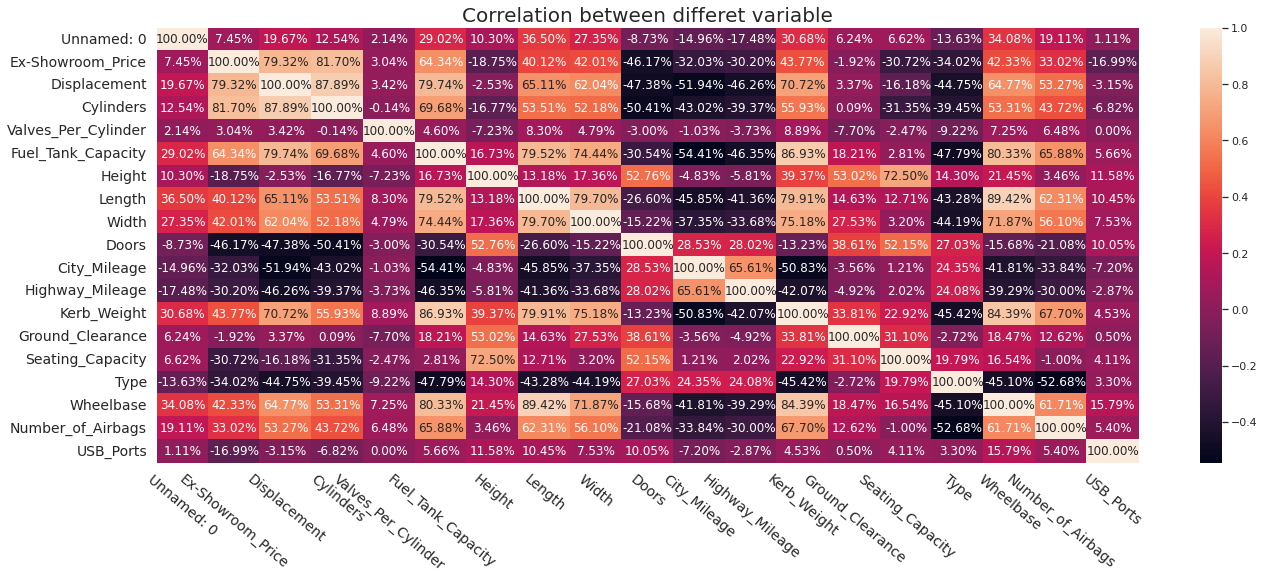

In [140]:
#plotting the heatmap to see the various relations between features
plt.figure(figsize=(22,8))
sns.heatmap(data.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

In [141]:
#ploting the relation between Engine_Size & City_Mileage and the showroom price for the customers with respect to the company it is made by
import plotly.express as px
import numpy as np
data['Make'].replace([np.nan], 'Anonymous', inplace=True)
fig = px.scatter_3d(data, x='Displacement', z='Ex-Showroom_Price', y='City_Mileage',color='Make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

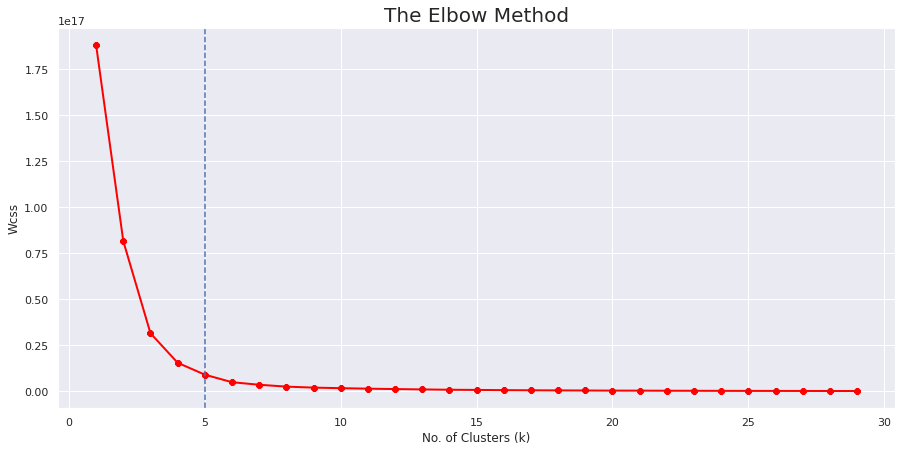

In [142]:
#plotting to find the number of clusters using the elbow method 
X=data[['Ex-Showroom_Price','Type']]
from sklearn.cluster import KMeans
#making a within cluster sum of square list
wcss=[] 
for i in range(1,30):
    km = KMeans(i)
    km.fit(X)
    wcss.append(km.inertia_)
fig, ax = plt.subplots(figsize=(15,7))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('Wcss')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 20)
plt.show()

In [143]:
#Fitting K-means clustering model with 5 clusters and adding a cluster column
km = KMeans(n_clusters=5, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(X)
data['cluster'] = clusters
data.cluster = (data.cluster + 1).astype('object')
data.head()

,Unnamed: 0,Make,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,cluster
0,0,Tata,Xt,292667.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN,2
1,1,Tata,Xe,236447.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN,2
2,2,Tata,Emax Xm,296661.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN,2
3,3,Tata,Xta,334768.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN,2
4,4,Tata,Xm,272223.0,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,...,NaN,NaN,NaN,NaN,1.793103,NaN,NaN,NaN,NaN,2


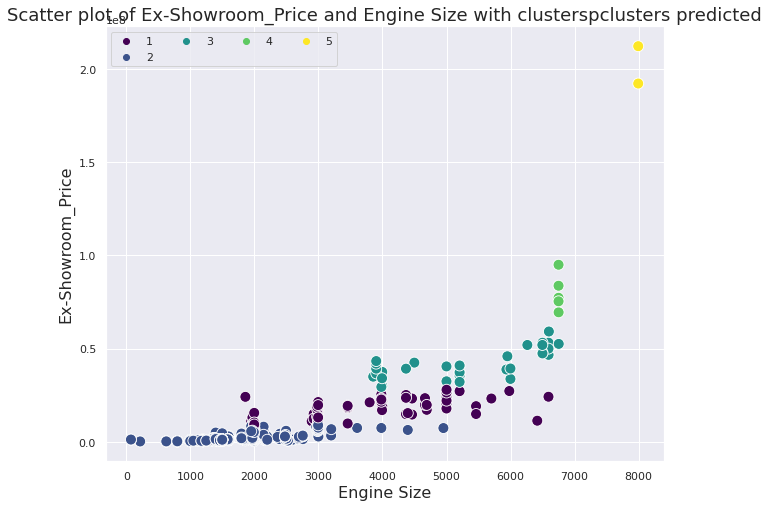

In [144]:
#Checking the scatterplot but with adding clusters for Ex-Showroom_Price vs Engine_Size
plt.figure(figsize=(10,8))
sns.scatterplot(data=data, y='Ex-Showroom_Price', x='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Ex-Showroom_Price and Engine Size with clusterspclusters predicted', fontsize=18)
plt.xlabel('Engine Size',fontsize=16)
plt.ylabel('Ex-Showroom_Price',fontsize=16);

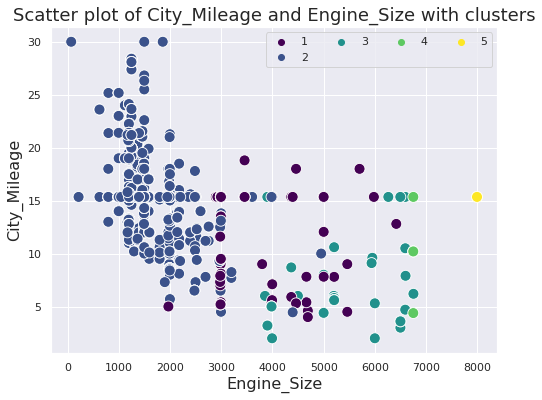

In [145]:
#Checking the scatterplot but with adding clusters for City_Mileage vs Engine_Size
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Displacement', y='City_Mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of City_Mileage and Engine_Size with clusters', fontsize=18);
plt.xlabel('Engine_Size',fontsize=16)
plt.ylabel('City_Mileage',fontsize=16);

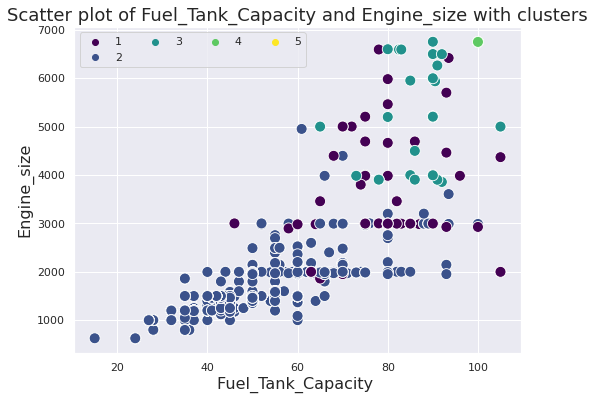

In [146]:
#Checking the scatterplot but with adding clusters for Fuel_Tank_Capacity vs Engine_Size
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='Fuel_Tank_Capacity', y='Displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of Fuel_Tank_Capacity and Engine_size with clusters', fontsize=18);
plt.xlabel('Fuel_Tank_Capacity ',fontsize=16)
plt.ylabel('Engine_size',fontsize=16);

In [147]:
#Making a 3d plot of Engine_Size VS Ex-Showroom_Price VS City_Mileage
fig = px.scatter_3d(data, x='Displacement', z='Ex-Showroom_Price', y='City_Mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=5,desat=1).as_hex(),
                   title='Ex-Showroom_Price VS Engine_Size VS City_Mileage')
fig.show()